In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut,train_test_split
from sklearn.decomposition import PCA


In [2]:
#导入数据
#对缺失值进行填补
train_X = np.empty(shape=[0,268],dtype=float)
train_Y = []
filePath = 'D:\Temple\jupyter_psychology\Shen268\ROI_FC_r_per\session1'
filePath_list = os.listdir(filePath)
cnt_nan = 0
for fp in filePath_list:
    fp_a = ['D:\Temple\jupyter_psychology\Shen268\ROI_FC_r_per\session1\\'+fp,'D:\Temple\jupyter_psychology\Shen268\ROI_FC_r_per\session2\\'+fp,'D:\Temple\jupyter_psychology\Shen268\ROI_FC_r_per\session3\\'+fp]
    train_Y = np.append(train_Y,[0,1,2],axis=0)
    for i in range(3):
        data =  np.loadtxt(fp_a[i])
        
        #数据去中心化，感觉没必要
        #data = data.apply(lambda x:(x - x.mean()))
        #PCA降维，二维矩阵变一维
        pca_alg = PCA(n_components = 1, whiten=True)
        data = pca_alg.fit_transform(data)
        data = data.ravel()
        train_X = np.append(train_X,[data],axis=0)
        #print(data)
        #print(train_X)

In [3]:
"""
#导入数据
#对缺失值进行填补
train_X = np.empty(shape=[0,268],dtype=int)
train_Y = []
filePath = 'D:\jupyter_psychology\Shen268\ROI_FC_r\session1'
filePath_list = os.listdir(filePath)
cnt_nan = 0
for fp in filePath_list:
    fp_a = ['D:\jupyter_psychology\Shen268\ROI_FC_r\session1\\'+fp,'D:\jupyter_psychology\Shen268\ROI_FC_r\session2\\'+fp,'D:\jupyter_psychology\Shen268\ROI_FC_r\session3\\'+fp]
    train_Y = np.append(train_Y,[0,1,2],axis=0)
    for i in range(3):
        data =  np.loadtxt(fp_a[i])
        # 缺失值处理
        where_are_nan = np.isnan(data)
        if(np.isnan(data).any()):
            if(i+1 >= 3):
                temp = np.loadtxt(fp_a[i-1])
            else:
                temp = np.loadtxt(fp_a[i+1])
            data[where_are_nan] = temp[where_are_nan]
        if(np.isnan(data).any()):
            temp = np.loadtxt(fp_a[(i+2)%3])
            data[where_are_nan] = temp[where_are_nan]
        if(np.isnan(data).any()):
            data[where_are_nan] = np.nanmean(data)
        #print(fp_a[i])
        #print(np.isnan(data).any())
        #数据去中心化，感觉没必要
        #data = data.apply(lambda x:(x - x.mean()))
        #PCA降维，二维矩阵变一维
        pca_alg = PCA(n_components = 1, whiten=True)
        data = pca_alg.fit_transform(data)
        data = data.ravel()
        train_X = np.append(train_X,[data],axis=0)
"""

"\n#导入数据\n#对缺失值进行填补\ntrain_X = np.empty(shape=[0,268],dtype=int)\ntrain_Y = []\nfilePath = 'D:\\jupyter_psychology\\Shen268\\ROI_FC_r\\session1'\nfilePath_list = os.listdir(filePath)\ncnt_nan = 0\nfor fp in filePath_list:\n    fp_a = ['D:\\jupyter_psychology\\Shen268\\ROI_FC_r\\session1\\'+fp,'D:\\jupyter_psychology\\Shen268\\ROI_FC_r\\session2\\'+fp,'D:\\jupyter_psychology\\Shen268\\ROI_FC_r\\session3\\'+fp]\n    train_Y = np.append(train_Y,[0,1,2],axis=0)\n    for i in range(3):\n        data =  np.loadtxt(fp_a[i])\n        # 缺失值处理\n        where_are_nan = np.isnan(data)\n        if(np.isnan(data).any()):\n            if(i+1 >= 3):\n                temp = np.loadtxt(fp_a[i-1])\n            else:\n                temp = np.loadtxt(fp_a[i+1])\n            data[where_are_nan] = temp[where_are_nan]\n        if(np.isnan(data).any()):\n            temp = np.loadtxt(fp_a[(i+2)%3])\n            data[where_are_nan] = temp[where_are_nan]\n        if(np.isnan(data).any()):\n            data[whe

In [4]:
# 数据划分
train_x = train_X[:159]
train_y = train_Y[:159]
test_x = train_X[159:]
test_y = train_Y[159:]
# 数据标准化 特征标度
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(train_x)
X_test = scaler.transform(test_x)

[1]	valid_0's multi_logloss: 1.07836
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.06342
[3]	valid_0's multi_logloss: 1.06375
[4]	valid_0's multi_logloss: 1.06776
[5]	valid_0's multi_logloss: 1.08015
[6]	valid_0's multi_logloss: 1.08086
[7]	valid_0's multi_logloss: 1.08769
[8]	valid_0's multi_logloss: 1.08224
[9]	valid_0's multi_logloss: 1.08623
[10]	valid_0's multi_logloss: 1.09161
[11]	valid_0's multi_logloss: 1.09703
[12]	valid_0's multi_logloss: 1.09603
Early stopping, best iteration is:
[2]	valid_0's multi_logloss: 1.06342
The rmse of prediction is: 0.9128709291752769


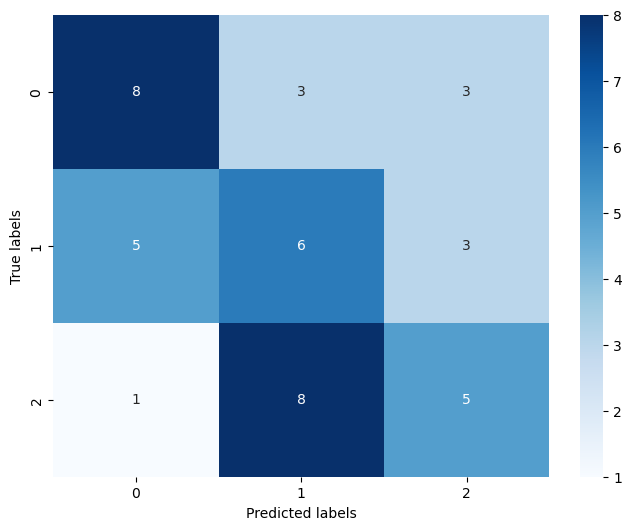

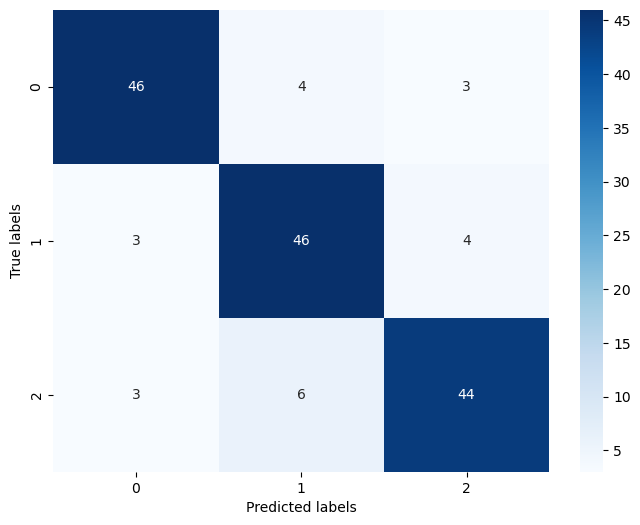

Classification Report(test):
              precision    recall  f1-score   support

         0.0       0.57      0.57      0.57        14
         1.0       0.35      0.43      0.39        14
         2.0       0.45      0.36      0.40        14

    accuracy                           0.45        42
   macro avg       0.46      0.45      0.45        42
weighted avg       0.46      0.45      0.45        42

Classification Report(train):
              precision    recall  f1-score   support

         0.0       0.88      0.87      0.88        53
         1.0       0.82      0.87      0.84        53
         2.0       0.86      0.83      0.85        53

    accuracy                           0.86       159
   macro avg       0.86      0.86      0.86       159
weighted avg       0.86      0.86      0.86       159

Accuracy: 0.4523809523809524
Accuracy: 0.8553459119496856


In [5]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score,recall_score,f1_score
from lightgbm import log_evaluation, early_stopping
# 创建模型，训练模型
gbm = lgb.LGBMClassifier(num_class = 3,
                            max_depth = 5,
                            #lambda = 10,
                            subsample = 0.8,
                            colsample_bytree = 0.9,
                            min_child_weight = 4,
                            num_leaves = 8,
                            seed = 0,
                            reg_alpha = 1e-05,
                            learning_rate = 0.1, n_estimators=500,verbosity= -1)
callbacks = [log_evaluation(period=1), early_stopping(stopping_rounds=10)]
gbm.fit(X_train, train_y, eval_set=[(X_test, test_y)], callbacks=callbacks)
# 预测
pred_test_y = gbm.predict(X_test, num_iteration=gbm.best_iteration_)
pred_train_y = gbm.predict(X_train, num_iteration=gbm.best_iteration_)
 
# 模型评估
print('The rmse of prediction is:', mean_squared_error(test_y, pred_test_y) ** 0.5)
result_test = confusion_matrix(test_y, pred_test_y)
# 利用热力图对于结果进行可视化
plt.figure(figsize=(8, 6))
sns.heatmap(result_test, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

result_train = confusion_matrix(train_y, pred_train_y)
plt.figure(figsize=(8, 6))
sns.heatmap(result_train, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


result1 = classification_report(test_y, pred_test_y)
print("Classification Report(test):", )
print(result1)
result1 = classification_report(train_y, pred_train_y)
print("Classification Report(train):", )
print(result1)

result2 = accuracy_score(test_y, pred_test_y)
print("Accuracy:", result2)

result3 = accuracy_score(train_y, pred_train_y)
print("Accuracy:", result3)

In [6]:
import seaborn as sns
X = np.arange(0,201,3)
total_importance = []
total_sorted_importance = []
sum_acc = 0
sum_pre = 0
sum_rec = 0
sum_f1 = 0
df = pd.read_csv("shen_268_parcellation_networklabels.csv",encoding="utf-8")
importance = {'medial frontal':0,'frontoparietal':0,'default mode':0,'subcortical-cerebellum':0,'motor':0,'visual I':0,'visual II':0,'visual association':0}
net_name = ['medial frontal','frontoparietal','default mode','subcortical-cerebellum','motor','visual I','visual II','visual association']
n = 0
#kf = KFold(n_splits=10,shuffle=False)  # 初始化KFold
#for train_index , test_index in kf.split(X):  # 调用split方法切分数据
loo = LeaveOneOut()
for train_index , test_index in loo.split(X):  # 调用split方法切分数据
    print(n)
    n += 1
    train_x = train_X[X[train_index]]
    train_y = train_Y[X[train_index]]
    #print('train_index:%s , test_index: %s ' %(X[train_index],X[test_index]))
    #print(train_x,train_y)
    train_x = np.append(train_x,train_X[X[train_index]+1],axis=0)
    train_y = np.append(train_y,train_Y[X[train_index]+1],axis=0)
    #print(train_x,train_y,)
    train_x = np.append(train_x,train_X[X[train_index]+2],axis=0)
    train_y = np.append(train_y,train_Y[X[train_index]+2],axis=0)
    #print(train_x,train_y)
    test_x = train_X[X[test_index]]
    test_y = train_Y[X[test_index]]
    test_x = np.append(test_x,train_X[X[test_index]+1],axis=0)
    test_x = np.append(test_x,train_X[X[test_index]+2],axis=0)
    test_y = np.append(test_y,train_Y[X[test_index]+1],axis=0)
    test_y = np.append(test_y,train_Y[X[test_index]+2],axis=0)
    train_x = scaler.fit_transform(train_x)
    test_x = scaler.transform(test_x)
    
    best_depth = 3
    best_score = 0
    for max_depth in range(3,10):
        gbm = lgb.LGBMClassifier(num_class = 3,
                            max_depth = max_depth,
                            #lambda = 10,
                            subsample = 0.8,
                            colsample_bytree = 0.9,
                            min_child_weight = 4,
                            num_leaves = 8,
                            seed = 0,
                            reg_alpha = 1e-05,
                            learning_rate = 0.01, n_estimators=100,verbosity= -1)
        gbm.fit(train_x, train_y, eval_set=[(test_x, test_y)], callbacks=callbacks)
        pred_test_y = gbm.predict(test_x, num_iteration=gbm.best_iteration_)
        score = accuracy_score(test_y, pred_test_y)
        if score > best_score:
            best_score = score
            best_depth = max_depth
            
    gbm = lgb.LGBMClassifier(num_class = 3,
                            max_depth = best_depth,
                            #lambda = 10,
                            subsample = 0.8,
                            colsample_bytree = 0.9,
                            min_child_weight = 4,
                            num_leaves = 8,
                            seed = 0,
                            reg_alpha = 1e-05,
                            learning_rate = 0.01, n_estimators=100,verbosity= -1)
    gbm.fit(train_x, train_y, eval_set=[(test_x, test_y)], callbacks=callbacks)
    # 预测
    pred_test_y = gbm.predict(test_x, num_iteration=gbm.best_iteration_)
    pred_train_y = gbm.predict(train_x, num_iteration=gbm.best_iteration_)
    print ('Train Accuracy: %.4f' % accuracy_score(train_y,pred_train_y))
    print ('Test Accuracy: %.4f' % accuracy_score(test_y,pred_test_y))
    #print('train_index:%s , test_index: %s ' %(X[train_index],X[test_index]))
    #print(train_x,train_y)
    sum_acc += accuracy_score(test_y,pred_test_y)
    sum_pre += precision_score(test_y,pred_test_y,average='macro')
    sum_rec += recall_score(test_y,pred_test_y,average='macro')
    sum_f1 += f1_score(test_y,pred_test_y,average='macro')
    '''
    ## 查看混淆矩阵 (预测值和真实值的各类情况统计矩阵)
    confusion_matrix_result = confusion_matrix(pred_test_y,test_y)
    # 利用热力图对于结果进行可视化
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

    confusion_matrix_result = confusion_matrix(pred_train_y,train_y)
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()
    '''
    
    Node_importance = gbm.feature_importances_
    print(Node_importance)
    # Compute net_importance
    df = pd.read_csv("shen_268_parcellation_networklabels.csv",encoding="utf-8")
    net_importance = {'medial frontal':0,'frontoparietal':0,'default mode':0,'subcortical-cerebellum':0,'motor':0,'visual I':0,'visual II':0,'visual association':0}
    
    sum_node = 0
    for i in range(0,268):
        net_importance[net_name[df['Network'][i]-1]] += Node_importance[i]
        #sum_node += Node_importance[i]
    
    print('net_importance : ',net_importance)
    tmp = [29,34,20,90,50,18,9,18]
    sum_importance = 0
    for x in range(8):
        net_importance[net_name[x]] = net_importance[net_name[x]]/tmp[x]
        sum_importance += net_importance[net_name[x]]
    
    print('net_importance : ',net_importance)
    for x in range(8):
        #if(net_importance[net_name[x]]==0):
         #   break;
        net_importance[net_name[x]] = net_importance[net_name[x]]/sum_importance
        importance[net_name[x]] += net_importance[net_name[x]]
        
    total_importance.append(net_importance)
    # Sort importances
    dict1_sorted_values = sorted(net_importance.items(),key = lambda x:x[1],reverse = True)
    sorted_net = {k:v for k,v in dict1_sorted_values}
    total_sorted_importance.append(sorted_net)
    '''
    # Plot importances 
    plt.figure(figsize=(18, 9))
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.bar(sorted_net.keys(), sorted_net.values())
    plt.title('Ranking of feature importance',fontsize='xx-large',fontweight='heavy')
    plt.xlabel('Network',fontsize=18)
    plt.ylabel('Feature Importance',fontsize=18)
    plt.show()
    '''


0
[1]	valid_0's multi_logloss: 1.10126
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.10162
[3]	valid_0's multi_logloss: 1.10278
[4]	valid_0's multi_logloss: 1.10556
[5]	valid_0's multi_logloss: 1.10744
[6]	valid_0's multi_logloss: 1.10849
[7]	valid_0's multi_logloss: 1.11178
[8]	valid_0's multi_logloss: 1.11207
[9]	valid_0's multi_logloss: 1.11215
[10]	valid_0's multi_logloss: 1.11339
[11]	valid_0's multi_logloss: 1.11328
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.10126
[1]	valid_0's multi_logloss: 1.10169
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.10011
[3]	valid_0's multi_logloss: 1.10045
[4]	valid_0's multi_logloss: 1.10485
[5]	valid_0's multi_logloss: 1.10511
[6]	valid_0's multi_logloss: 1.10951
[7]	valid_0's multi_logloss: 1.11053
[8]	valid_0's multi_logloss: 1.11165
[9]	valid_0's multi_logloss: 1.11446
[10]	valid_0's multi_logloss: 1.11608
[11]	valid_0's multi_log

D:\Temple\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[6]	valid_0's multi_logloss: 1.11282
[7]	valid_0's multi_logloss: 1.11646
[8]	valid_0's multi_logloss: 1.12023
[9]	valid_0's multi_logloss: 1.11968
[10]	valid_0's multi_logloss: 1.12129
[11]	valid_0's multi_logloss: 1.11907
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.10264
[1]	valid_0's multi_logloss: 1.10219
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.10492
[3]	valid_0's multi_logloss: 1.10711
[4]	valid_0's multi_logloss: 1.11073
[5]	valid_0's multi_logloss: 1.11141
[6]	valid_0's multi_logloss: 1.11281
[7]	valid_0's multi_logloss: 1.11707
[8]	valid_0's multi_logloss: 1.12295
[9]	valid_0's multi_logloss: 1.12287
[10]	valid_0's multi_logloss: 1.12307
[11]	valid_0's multi_logloss: 1.11981
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.10219
[1]	valid_0's multi_logloss: 1.10238
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.10512
[3]	valid_0's multi_logloss

D:\Temple\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[34]	valid_0's multi_logloss: 1.04508
[35]	valid_0's multi_logloss: 1.04439
[36]	valid_0's multi_logloss: 1.03965
[37]	valid_0's multi_logloss: 1.0378
[38]	valid_0's multi_logloss: 1.03732
[39]	valid_0's multi_logloss: 1.03331
[40]	valid_0's multi_logloss: 1.02792
[41]	valid_0's multi_logloss: 1.02421
[42]	valid_0's multi_logloss: 1.01994
[43]	valid_0's multi_logloss: 1.01566
[44]	valid_0's multi_logloss: 1.01157
[45]	valid_0's multi_logloss: 1.0062
[46]	valid_0's multi_logloss: 1.00392
[47]	valid_0's multi_logloss: 1.00142
[48]	valid_0's multi_logloss: 1.00067
[49]	valid_0's multi_logloss: 0.998389
[50]	valid_0's multi_logloss: 0.995227
[51]	valid_0's multi_logloss: 0.991869
[52]	valid_0's multi_logloss: 0.993329
[53]	valid_0's multi_logloss: 0.990427
[54]	valid_0's multi_logloss: 0.987909
[55]	valid_0's multi_logloss: 0.984165
[56]	valid_0's multi_logloss: 0.98339
[57]	valid_0's multi_logloss: 0.982975
[58]	valid_0's multi_logloss: 0.97856
[59]	valid_0's multi_logloss: 0.975425
[60]	

D:\Temple\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[8]	valid_0's multi_logloss: 1.07328
[9]	valid_0's multi_logloss: 1.06895
[10]	valid_0's multi_logloss: 1.06704
[11]	valid_0's multi_logloss: 1.06597
[12]	valid_0's multi_logloss: 1.06008
[13]	valid_0's multi_logloss: 1.06055
[14]	valid_0's multi_logloss: 1.05778
[15]	valid_0's multi_logloss: 1.0559
[16]	valid_0's multi_logloss: 1.05387
[17]	valid_0's multi_logloss: 1.05193
[18]	valid_0's multi_logloss: 1.05046
[19]	valid_0's multi_logloss: 1.04948
[20]	valid_0's multi_logloss: 1.04845
[21]	valid_0's multi_logloss: 1.0474
[22]	valid_0's multi_logloss: 1.04553
[23]	valid_0's multi_logloss: 1.04296
[24]	valid_0's multi_logloss: 1.03901
[25]	valid_0's multi_logloss: 1.03788
[26]	valid_0's multi_logloss: 1.03637
[27]	valid_0's multi_logloss: 1.03449
[28]	valid_0's multi_logloss: 1.03359
[29]	valid_0's multi_logloss: 1.03158
[30]	valid_0's multi_logloss: 1.03251
[31]	valid_0's multi_logloss: 1.02783
[32]	valid_0's multi_logloss: 1.02866
[33]	valid_0's multi_logloss: 1.02601
[34]	valid_0's m

D:\Temple\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[15]	valid_0's multi_logloss: 1.05571
[16]	valid_0's multi_logloss: 1.05219
[17]	valid_0's multi_logloss: 1.04912
[18]	valid_0's multi_logloss: 1.04752
[19]	valid_0's multi_logloss: 1.04868
[20]	valid_0's multi_logloss: 1.04702
[21]	valid_0's multi_logloss: 1.0424
[22]	valid_0's multi_logloss: 1.0386
[23]	valid_0's multi_logloss: 1.03731
[24]	valid_0's multi_logloss: 1.03575
[25]	valid_0's multi_logloss: 1.03339
[26]	valid_0's multi_logloss: 1.02865
[27]	valid_0's multi_logloss: 1.02387
[28]	valid_0's multi_logloss: 1.02354
[29]	valid_0's multi_logloss: 1.02214
[30]	valid_0's multi_logloss: 1.02111
[31]	valid_0's multi_logloss: 1.02094
[32]	valid_0's multi_logloss: 1.02185
[33]	valid_0's multi_logloss: 1.0222
[34]	valid_0's multi_logloss: 1.02124
[35]	valid_0's multi_logloss: 1.02103
[36]	valid_0's multi_logloss: 1.02177
[37]	valid_0's multi_logloss: 1.02234
[38]	valid_0's multi_logloss: 1.02418
[39]	valid_0's multi_logloss: 1.02314
[40]	valid_0's multi_logloss: 1.02247
[41]	valid_0's 

D:\Temple\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[67]	valid_0's multi_logloss: 0.791266
[68]	valid_0's multi_logloss: 0.787479
[69]	valid_0's multi_logloss: 0.785979
[70]	valid_0's multi_logloss: 0.782226
[71]	valid_0's multi_logloss: 0.777104
[72]	valid_0's multi_logloss: 0.774924
[73]	valid_0's multi_logloss: 0.774322
[74]	valid_0's multi_logloss: 0.768701
[75]	valid_0's multi_logloss: 0.765733
[76]	valid_0's multi_logloss: 0.760261
[77]	valid_0's multi_logloss: 0.757862
[78]	valid_0's multi_logloss: 0.755497
[79]	valid_0's multi_logloss: 0.75218
[80]	valid_0's multi_logloss: 0.749761
[81]	valid_0's multi_logloss: 0.746931
[82]	valid_0's multi_logloss: 0.743808
[83]	valid_0's multi_logloss: 0.743456
[84]	valid_0's multi_logloss: 0.740989
[85]	valid_0's multi_logloss: 0.735838
[86]	valid_0's multi_logloss: 0.732293
[87]	valid_0's multi_logloss: 0.730246
[88]	valid_0's multi_logloss: 0.728699
[89]	valid_0's multi_logloss: 0.724333
[90]	valid_0's multi_logloss: 0.723725
[91]	valid_0's multi_logloss: 0.719917
[92]	valid_0's multi_loglo

D:\Temple\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[1]	valid_0's multi_logloss: 1.09502
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.09142
[3]	valid_0's multi_logloss: 1.08787
[4]	valid_0's multi_logloss: 1.08402
[5]	valid_0's multi_logloss: 1.08406
[6]	valid_0's multi_logloss: 1.0802
[7]	valid_0's multi_logloss: 1.07647
[8]	valid_0's multi_logloss: 1.07913
[9]	valid_0's multi_logloss: 1.07628
[10]	valid_0's multi_logloss: 1.08344
[11]	valid_0's multi_logloss: 1.07987
[12]	valid_0's multi_logloss: 1.08607
[13]	valid_0's multi_logloss: 1.08484
[14]	valid_0's multi_logloss: 1.09088
[15]	valid_0's multi_logloss: 1.08755
[16]	valid_0's multi_logloss: 1.08866
[17]	valid_0's multi_logloss: 1.09444
[18]	valid_0's multi_logloss: 1.09225
[19]	valid_0's multi_logloss: 1.09792
Early stopping, best iteration is:
[9]	valid_0's multi_logloss: 1.07628
[1]	valid_0's multi_logloss: 1.09448
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.09126
[3]	valid_0's multi_

D:\Temple\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[7]	valid_0's multi_logloss: 1.10701
[8]	valid_0's multi_logloss: 1.10783
[9]	valid_0's multi_logloss: 1.11022
[10]	valid_0's multi_logloss: 1.11319
[11]	valid_0's multi_logloss: 1.11465
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.10219
[1]	valid_0's multi_logloss: 1.10219
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.10481
[3]	valid_0's multi_logloss: 1.10879
[4]	valid_0's multi_logloss: 1.10819
[5]	valid_0's multi_logloss: 1.11133
[6]	valid_0's multi_logloss: 1.1062
[7]	valid_0's multi_logloss: 1.10701
[8]	valid_0's multi_logloss: 1.10783
[9]	valid_0's multi_logloss: 1.11022
[10]	valid_0's multi_logloss: 1.11319
[11]	valid_0's multi_logloss: 1.11465
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.10219
[1]	valid_0's multi_logloss: 1.10219
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.10481
[3]	valid_0's multi_logloss: 1.10879
[4]	valid_0's multi_logloss:

D:\Temple\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[1]	valid_0's multi_logloss: 1.09774
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.09496
[3]	valid_0's multi_logloss: 1.09588
[4]	valid_0's multi_logloss: 1.09215
[5]	valid_0's multi_logloss: 1.08798
[6]	valid_0's multi_logloss: 1.08433
[7]	valid_0's multi_logloss: 1.0853
[8]	valid_0's multi_logloss: 1.08466
[9]	valid_0's multi_logloss: 1.08506
[10]	valid_0's multi_logloss: 1.08287
[11]	valid_0's multi_logloss: 1.08166
[12]	valid_0's multi_logloss: 1.08291
[13]	valid_0's multi_logloss: 1.07974
[14]	valid_0's multi_logloss: 1.07957
[15]	valid_0's multi_logloss: 1.07814
[16]	valid_0's multi_logloss: 1.07413
[17]	valid_0's multi_logloss: 1.06946
[18]	valid_0's multi_logloss: 1.06936
[19]	valid_0's multi_logloss: 1.06722
[20]	valid_0's multi_logloss: 1.06325
[21]	valid_0's multi_logloss: 1.06038
[22]	valid_0's multi_logloss: 1.0618
[23]	valid_0's multi_logloss: 1.0656
[24]	valid_0's multi_logloss: 1.06082
[25]	valid_0's multi_logloss: 1.06408
[

D:\Temple\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[4]	valid_0's multi_logloss: 1.09307
[5]	valid_0's multi_logloss: 1.09296
[6]	valid_0's multi_logloss: 1.09139
[7]	valid_0's multi_logloss: 1.08742
[8]	valid_0's multi_logloss: 1.08591
[9]	valid_0's multi_logloss: 1.08447
[10]	valid_0's multi_logloss: 1.08143
[11]	valid_0's multi_logloss: 1.08116
[12]	valid_0's multi_logloss: 1.08182
[13]	valid_0's multi_logloss: 1.07962
[14]	valid_0's multi_logloss: 1.07984
[15]	valid_0's multi_logloss: 1.08108
[16]	valid_0's multi_logloss: 1.07994
[17]	valid_0's multi_logloss: 1.08095
[18]	valid_0's multi_logloss: 1.08309
[19]	valid_0's multi_logloss: 1.08598
[20]	valid_0's multi_logloss: 1.08494
[21]	valid_0's multi_logloss: 1.08873
[22]	valid_0's multi_logloss: 1.08782
[23]	valid_0's multi_logloss: 1.09382
Early stopping, best iteration is:
[13]	valid_0's multi_logloss: 1.07962
[1]	valid_0's multi_logloss: 1.09572
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.09635
[3]	valid_0's multi_logloss: 1.0947
[4

D:\Temple\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[5]	valid_0's multi_logloss: 1.11199
[6]	valid_0's multi_logloss: 1.1149
[7]	valid_0's multi_logloss: 1.11031
[8]	valid_0's multi_logloss: 1.11316
[9]	valid_0's multi_logloss: 1.11474
[10]	valid_0's multi_logloss: 1.11306
[11]	valid_0's multi_logloss: 1.10896
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.10082
[1]	valid_0's multi_logloss: 1.10082
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.10292
[3]	valid_0's multi_logloss: 1.10515
[4]	valid_0's multi_logloss: 1.10799
[5]	valid_0's multi_logloss: 1.11199
[6]	valid_0's multi_logloss: 1.1149
[7]	valid_0's multi_logloss: 1.1103
[8]	valid_0's multi_logloss: 1.11315
[9]	valid_0's multi_logloss: 1.11473
[10]	valid_0's multi_logloss: 1.11305
[11]	valid_0's multi_logloss: 1.1086
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.10082
[1]	valid_0's multi_logloss: 1.10082
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.

D:\Temple\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[2]	valid_0's multi_logloss: 1.0959
[3]	valid_0's multi_logloss: 1.09647
[4]	valid_0's multi_logloss: 1.09849
[5]	valid_0's multi_logloss: 1.0973
[6]	valid_0's multi_logloss: 1.0989
[7]	valid_0's multi_logloss: 1.09453
[8]	valid_0's multi_logloss: 1.08984
[9]	valid_0's multi_logloss: 1.08687
[10]	valid_0's multi_logloss: 1.08496
[11]	valid_0's multi_logloss: 1.08632
[12]	valid_0's multi_logloss: 1.0852
[13]	valid_0's multi_logloss: 1.08219
[14]	valid_0's multi_logloss: 1.07666
[15]	valid_0's multi_logloss: 1.07337
[16]	valid_0's multi_logloss: 1.07096
[17]	valid_0's multi_logloss: 1.07089
[18]	valid_0's multi_logloss: 1.06596
[19]	valid_0's multi_logloss: 1.07267
[20]	valid_0's multi_logloss: 1.06993
[21]	valid_0's multi_logloss: 1.07575
[22]	valid_0's multi_logloss: 1.07354
[23]	valid_0's multi_logloss: 1.07387
[24]	valid_0's multi_logloss: 1.07331
[25]	valid_0's multi_logloss: 1.07279
[26]	valid_0's multi_logloss: 1.07076
[27]	valid_0's multi_logloss: 1.07291
[28]	valid_0's multi_log

D:\Temple\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[31]	valid_0's multi_logloss: 1.04999
[32]	valid_0's multi_logloss: 1.04923
[33]	valid_0's multi_logloss: 1.04805
[34]	valid_0's multi_logloss: 1.04966
[35]	valid_0's multi_logloss: 1.04449
[36]	valid_0's multi_logloss: 1.04247
[37]	valid_0's multi_logloss: 1.04148
[38]	valid_0's multi_logloss: 1.04185
[39]	valid_0's multi_logloss: 1.03751
[40]	valid_0's multi_logloss: 1.03659
[41]	valid_0's multi_logloss: 1.03171
[42]	valid_0's multi_logloss: 1.03002
[43]	valid_0's multi_logloss: 1.03016
[44]	valid_0's multi_logloss: 1.02544
[45]	valid_0's multi_logloss: 1.02756
[46]	valid_0's multi_logloss: 1.02765
[47]	valid_0's multi_logloss: 1.02692
[48]	valid_0's multi_logloss: 1.02067
[49]	valid_0's multi_logloss: 1.01722
[50]	valid_0's multi_logloss: 1.01357
[51]	valid_0's multi_logloss: 1.01372
[52]	valid_0's multi_logloss: 1.01048
[53]	valid_0's multi_logloss: 1.01361
[54]	valid_0's multi_logloss: 1.00992
[55]	valid_0's multi_logloss: 1.01232
[56]	valid_0's multi_logloss: 1.00685
[57]	valid_0

D:\Temple\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[1]	valid_0's multi_logloss: 1.09948
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.10635
[3]	valid_0's multi_logloss: 1.11127
[4]	valid_0's multi_logloss: 1.11717
[5]	valid_0's multi_logloss: 1.12726
[6]	valid_0's multi_logloss: 1.13435
[7]	valid_0's multi_logloss: 1.14351
[8]	valid_0's multi_logloss: 1.14437
[9]	valid_0's multi_logloss: 1.15037
[10]	valid_0's multi_logloss: 1.15537
[11]	valid_0's multi_logloss: 1.16424
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.09948
[1]	valid_0's multi_logloss: 1.09938
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.10442
[3]	valid_0's multi_logloss: 1.10918
[4]	valid_0's multi_logloss: 1.11508
[5]	valid_0's multi_logloss: 1.12516
[6]	valid_0's multi_logloss: 1.13279
[7]	valid_0's multi_logloss: 1.14225
[8]	valid_0's multi_logloss: 1.14173
[9]	valid_0's multi_logloss: 1.14984
[10]	valid_0's multi_logloss: 1.15334
[11]	valid_0's multi_loglo

D:\Temple\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[8]	valid_0's multi_logloss: 1.14868
[9]	valid_0's multi_logloss: 1.15217
[10]	valid_0's multi_logloss: 1.15798
[11]	valid_0's multi_logloss: 1.15718
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.10579
[1]	valid_0's multi_logloss: 1.10597
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.10715
[3]	valid_0's multi_logloss: 1.11282
[4]	valid_0's multi_logloss: 1.12254
[5]	valid_0's multi_logloss: 1.13021
[6]	valid_0's multi_logloss: 1.13721
[7]	valid_0's multi_logloss: 1.13999
[8]	valid_0's multi_logloss: 1.14894
[9]	valid_0's multi_logloss: 1.15244
[10]	valid_0's multi_logloss: 1.15845
[11]	valid_0's multi_logloss: 1.15763
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.10597
[1]	valid_0's multi_logloss: 1.10597
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.10715
[3]	valid_0's multi_logloss: 1.11282
[4]	valid_0's multi_logloss: 1.12253
[5]	valid_0's multi_logloss

D:\Temple\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[23]	valid_0's multi_logloss: 1.10154
[24]	valid_0's multi_logloss: 1.10165
[25]	valid_0's multi_logloss: 1.09869
Early stopping, best iteration is:
[15]	valid_0's multi_logloss: 1.08451
[1]	valid_0's multi_logloss: 1.09748
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.09628
[3]	valid_0's multi_logloss: 1.09201
[4]	valid_0's multi_logloss: 1.09188
[5]	valid_0's multi_logloss: 1.09397
[6]	valid_0's multi_logloss: 1.09656
[7]	valid_0's multi_logloss: 1.09414
[8]	valid_0's multi_logloss: 1.09025
[9]	valid_0's multi_logloss: 1.08962
[10]	valid_0's multi_logloss: 1.09465
[11]	valid_0's multi_logloss: 1.09223
[12]	valid_0's multi_logloss: 1.09743
[13]	valid_0's multi_logloss: 1.09581
[14]	valid_0's multi_logloss: 1.09602
[15]	valid_0's multi_logloss: 1.09055
[16]	valid_0's multi_logloss: 1.09259
[17]	valid_0's multi_logloss: 1.09109
[18]	valid_0's multi_logloss: 1.09585
[19]	valid_0's multi_logloss: 1.09791
Early stopping, best iteration is:
[9]	

D:\Temple\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[7]	valid_0's multi_logloss: 1.12319
[8]	valid_0's multi_logloss: 1.12323
[9]	valid_0's multi_logloss: 1.12217
[10]	valid_0's multi_logloss: 1.12119
[11]	valid_0's multi_logloss: 1.1244
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.09853
[1]	valid_0's multi_logloss: 1.09853
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.10508
[3]	valid_0's multi_logloss: 1.10796
[4]	valid_0's multi_logloss: 1.11084
[5]	valid_0's multi_logloss: 1.11405
[6]	valid_0's multi_logloss: 1.11774
[7]	valid_0's multi_logloss: 1.12319
[8]	valid_0's multi_logloss: 1.12323
[9]	valid_0's multi_logloss: 1.12217
[10]	valid_0's multi_logloss: 1.12119
[11]	valid_0's multi_logloss: 1.1244
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.09853
[1]	valid_0's multi_logloss: 1.09853
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.10508
[3]	valid_0's multi_logloss: 1.10796
[4]	valid_0's multi_logloss: 

D:\Temple\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[1]	valid_0's multi_logloss: 1.09149
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.08723
[3]	valid_0's multi_logloss: 1.0789
[4]	valid_0's multi_logloss: 1.07223
[5]	valid_0's multi_logloss: 1.07061
[6]	valid_0's multi_logloss: 1.06863
[7]	valid_0's multi_logloss: 1.07091
[8]	valid_0's multi_logloss: 1.0695
[9]	valid_0's multi_logloss: 1.06069
[10]	valid_0's multi_logloss: 1.05909
[11]	valid_0's multi_logloss: 1.0559
[12]	valid_0's multi_logloss: 1.05386
[13]	valid_0's multi_logloss: 1.05599
[14]	valid_0's multi_logloss: 1.05481
[15]	valid_0's multi_logloss: 1.05392
[16]	valid_0's multi_logloss: 1.05259
[17]	valid_0's multi_logloss: 1.05153
[18]	valid_0's multi_logloss: 1.05083
[19]	valid_0's multi_logloss: 1.04959
[20]	valid_0's multi_logloss: 1.04722
[21]	valid_0's multi_logloss: 1.04253
[22]	valid_0's multi_logloss: 1.04128
[23]	valid_0's multi_logloss: 1.03826
[24]	valid_0's multi_logloss: 1.03269
[25]	valid_0's multi_logloss: 1.0278
[2

D:\Temple\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[97]	valid_0's multi_logloss: 0.840806
[98]	valid_0's multi_logloss: 0.838135
[99]	valid_0's multi_logloss: 0.838467
[100]	valid_0's multi_logloss: 0.834248
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.834248
[1]	valid_0's multi_logloss: 1.09211
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.08666
[3]	valid_0's multi_logloss: 1.07951
[4]	valid_0's multi_logloss: 1.07269
[5]	valid_0's multi_logloss: 1.06644
[6]	valid_0's multi_logloss: 1.05909
[7]	valid_0's multi_logloss: 1.05283
[8]	valid_0's multi_logloss: 1.04541
[9]	valid_0's multi_logloss: 1.03561
[10]	valid_0's multi_logloss: 1.02901
[11]	valid_0's multi_logloss: 1.02587
[12]	valid_0's multi_logloss: 1.01825
[13]	valid_0's multi_logloss: 1.0119
[14]	valid_0's multi_logloss: 1.00694
[15]	valid_0's multi_logloss: 0.998568
[16]	valid_0's multi_logloss: 0.993053
[17]	valid_0's multi_logloss: 0.987825
[18]	valid_0's multi_logloss: 0.983178
[19]	valid_0's m

D:\Temple\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[ 1 12  0 19 29  7  6 57  1  0  5  0  0  0  0 10  0  0  2  0  6  0  0  7
  0  0  7  0  0  1  0  0  6  0  0  0  0  0  0  0  0 15  0  2  0  0  2  0
  0  6  0  4  0  0  0  0  0  0  2 44  0  6  0  0  0  0  0  0  0 29  2  0
  0  1 71  0  3  1  0  0  0  0  8  5  0  6  0  0  5  0  3  0  0  7  0  7
  0  7  1 24 12  0  6 63 29  0  2  5  1  0 11  0  0  0  0  0  3  4 29  6
  0  0  6  0  0  9  4  0  0 13  0  0 31  0 11 36  0 20  7  2 18  7  0  0
  2  5  0  0 18  0  0  8  0  0  0  1  0  0  0  0  0  0 41  0  0 14  0  0
  0  5  4  0  0 19  0  3  2 15  0  0  1  0  2  8  1  0 12  0  0  2  0  1
  0  0 27  0  0  0  0  0  3  0  0 16  2  0  0  0  1  4  0  0  0  1  0  0
  7  0 16  3 33  0  0  0  0  2  0  4  0  0  0  6  0 23  1  0 37  0  5  0
  1  0  1 12  9  0  0  0  0  0 21  0 13  2  2  5  0  0  0  0  0 31  0  0
  0  3  0  0]
net_importance :  {'medial frontal': 71, 'frontoparietal': 157, 'default mode': 98, 'subcortical-cerebellum': 545, 'motor': 197, 'visual I': 101, 'visual II': 27, 'visual association'

D:\Temple\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0 3 0 2 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0
 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 1 0 0 0 3 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0]
net_importance :  {'medial frontal': 2, 'frontoparietal': 12, 'default mode': 1, 'subcortical-cerebellum': 13, 'motor': 0, 'visual I': 5, 'visual II': 0, 'visual association': 1}
net_importance :  {'medial frontal': 0.06896551724137931, 'frontoparietal': 0.35294117647058826, 'default mode': 0.05, 'subcortical-cerebellum': 0.14444444444444443, 'motor': 0.0, 'visual I': 0.2777777777777778, 'visual II': 0.0, 'visual association': 0.05555555555555555}
30


D:\Temple\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[1]	valid_0's multi_logloss: 1.09177
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.08594
[3]	valid_0's multi_logloss: 1.07963
[4]	valid_0's multi_logloss: 1.07231
[5]	valid_0's multi_logloss: 1.0691
[6]	valid_0's multi_logloss: 1.06622
[7]	valid_0's multi_logloss: 1.05841
[8]	valid_0's multi_logloss: 1.05523
[9]	valid_0's multi_logloss: 1.05256
[10]	valid_0's multi_logloss: 1.04612
[11]	valid_0's multi_logloss: 1.03766
[12]	valid_0's multi_logloss: 1.03492
[13]	valid_0's multi_logloss: 1.02929
[14]	valid_0's multi_logloss: 1.02639
[15]	valid_0's multi_logloss: 1.02414
[16]	valid_0's multi_logloss: 1.02035
[17]	valid_0's multi_logloss: 1.0188
[18]	valid_0's multi_logloss: 1.01224
[19]	valid_0's multi_logloss: 1.01017
[20]	valid_0's multi_logloss: 1.00471
[21]	valid_0's multi_logloss: 1.00401
[22]	valid_0's multi_logloss: 0.998884
[23]	valid_0's multi_logloss: 0.996732
[24]	valid_0's multi_logloss: 0.992945
[25]	valid_0's multi_logloss: 0.987

D:\Temple\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[5]	valid_0's multi_logloss: 1.0927
[6]	valid_0's multi_logloss: 1.09229
[7]	valid_0's multi_logloss: 1.0923
[8]	valid_0's multi_logloss: 1.09276
[9]	valid_0's multi_logloss: 1.09486
[10]	valid_0's multi_logloss: 1.09326
[11]	valid_0's multi_logloss: 1.09184
[12]	valid_0's multi_logloss: 1.09467
[13]	valid_0's multi_logloss: 1.09773
[14]	valid_0's multi_logloss: 1.10026
[15]	valid_0's multi_logloss: 1.1004
[16]	valid_0's multi_logloss: 1.10049
[17]	valid_0's multi_logloss: 1.10131
[18]	valid_0's multi_logloss: 1.10451
[19]	valid_0's multi_logloss: 1.10515
[20]	valid_0's multi_logloss: 1.10351
[21]	valid_0's multi_logloss: 1.1041
Early stopping, best iteration is:
[11]	valid_0's multi_logloss: 1.09184
[1]	valid_0's multi_logloss: 1.09782
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.0968
[3]	valid_0's multi_logloss: 1.09564
[4]	valid_0's multi_logloss: 1.0958
[5]	valid_0's multi_logloss: 1.09524
[6]	valid_0's multi_logloss: 1.09665
[7]	valid

D:\Temple\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 2 0 0 0 0 0 1 0 0 0 0 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 4 0 0 0 4 3 0 0 0
 0 0 0 0 0 0 0 0 0]
net_importance :  {'medial frontal': 0, 'frontoparietal': 15, 'default mode': 1, 'subcortical-cerebellum': 22, 'motor': 12, 'visual I': 5, 'visual II': 0, 'visual association': 4}
net_importance :  {'medial frontal': 0.0, 'frontoparietal': 0.4411764705882353, 'default mode': 0.05, 'subcortical-cerebellum': 0.24444444444444444, 'motor': 0.24, 'visual I': 0.2777777777777778, 'visual II': 0.0, 'visual association': 0.2222222222222222}
34
[1]	valid_0's mu

D:\Temple\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[1]	valid_0's multi_logloss: 1.10172
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.108
[3]	valid_0's multi_logloss: 1.1131
[4]	valid_0's multi_logloss: 1.11899
[5]	valid_0's multi_logloss: 1.1219
[6]	valid_0's multi_logloss: 1.12491
[7]	valid_0's multi_logloss: 1.12697
[8]	valid_0's multi_logloss: 1.1308
[9]	valid_0's multi_logloss: 1.13329
[10]	valid_0's multi_logloss: 1.13402
[11]	valid_0's multi_logloss: 1.13441
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.10172
[1]	valid_0's multi_logloss: 1.10166
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.10806
[3]	valid_0's multi_logloss: 1.11588
[4]	valid_0's multi_logloss: 1.12218
[5]	valid_0's multi_logloss: 1.12195
[6]	valid_0's multi_logloss: 1.123
[7]	valid_0's multi_logloss: 1.12585
[8]	valid_0's multi_logloss: 1.12992
[9]	valid_0's multi_logloss: 1.13213
[10]	valid_0's multi_logloss: 1.13549
[11]	valid_0's multi_logloss: 1.1

D:\Temple\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[51]	valid_0's multi_logloss: 0.901607
[52]	valid_0's multi_logloss: 0.89893
[53]	valid_0's multi_logloss: 0.895931
[54]	valid_0's multi_logloss: 0.894963
[55]	valid_0's multi_logloss: 0.893581
[56]	valid_0's multi_logloss: 0.890949
[57]	valid_0's multi_logloss: 0.889179
[58]	valid_0's multi_logloss: 0.8854
[59]	valid_0's multi_logloss: 0.883754
[60]	valid_0's multi_logloss: 0.878749
[61]	valid_0's multi_logloss: 0.876572
[62]	valid_0's multi_logloss: 0.87909
[63]	valid_0's multi_logloss: 0.880831
[64]	valid_0's multi_logloss: 0.881639
[65]	valid_0's multi_logloss: 0.878528
[66]	valid_0's multi_logloss: 0.881522
[67]	valid_0's multi_logloss: 0.878809
[68]	valid_0's multi_logloss: 0.879658
[69]	valid_0's multi_logloss: 0.877021
[70]	valid_0's multi_logloss: 0.872445
[71]	valid_0's multi_logloss: 0.870613
[72]	valid_0's multi_logloss: 0.870192
[73]	valid_0's multi_logloss: 0.873461
[74]	valid_0's multi_logloss: 0.870101
[75]	valid_0's multi_logloss: 0.868908
[76]	valid_0's multi_logloss:

D:\Temple\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[ 0 12  0  2 24  0  0 65  0  1  0  0  0  0  0  0  9  0  1  0 24  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  7  4  4  5  0  0  0  0  0  4
  0  0  2  0  0  0  0  0  1 15  6 50  0  0  4  3  0  0  0  0  0 40  0  0
  2  7 67  0  1  0  0  0  0  0  2  1  3  0  0  0  0  0  0  0  1  7  1 10
  2  0  0 22  8  1  2 44 33  0  0 10  0  0 16  3  0  0  0  0  6  6  1  0
  0  0 12  0  8  0 10 10  1 23 19  0 40  0  7 39  0  9 20  0 25  0  0  0
 11  0  4  0 19  0  0 14  0  1  0  0  0  0  0  0  0  0 27  2  0 10  0  0
  1  5 13  0  0  5  0  0  5  3  0  0  2  0  0 11  0  0  3  0  0  0 25  0
  0  0 20  1  0  0  0  0  2  1  0 24  0  1  0  0  0  3  0  0  0  0 17  4
  5  0 13  6 25  0  0  0  0  0  0 20  1  0  0 13  4  9  0  0 14  0  1  0
  6  0  0 12  2  0  1  4  0  0 35  0  4  3  5  4  0  0  0  0  0 36  1  1
  5  0 12  4]
net_importance :  {'medial frontal': 51, 'frontoparietal': 204, 'default mode': 72, 'subcortical-cerebellum': 525, 'motor': 213, 'visual I': 94, 'visual II': 29, 'visual association':

D:\Temple\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[5]	valid_0's multi_logloss: 1.08154
[6]	valid_0's multi_logloss: 1.07855
[7]	valid_0's multi_logloss: 1.08085
[8]	valid_0's multi_logloss: 1.08046
[9]	valid_0's multi_logloss: 1.07565
[10]	valid_0's multi_logloss: 1.07533
[11]	valid_0's multi_logloss: 1.07844
[12]	valid_0's multi_logloss: 1.07706
[13]	valid_0's multi_logloss: 1.07932
[14]	valid_0's multi_logloss: 1.0753
[15]	valid_0's multi_logloss: 1.07148
[16]	valid_0's multi_logloss: 1.06772
[17]	valid_0's multi_logloss: 1.06865
[18]	valid_0's multi_logloss: 1.06568
[19]	valid_0's multi_logloss: 1.06476
[20]	valid_0's multi_logloss: 1.06468
[21]	valid_0's multi_logloss: 1.06097
[22]	valid_0's multi_logloss: 1.05989
[23]	valid_0's multi_logloss: 1.05835
[24]	valid_0's multi_logloss: 1.0583
[25]	valid_0's multi_logloss: 1.05537
[26]	valid_0's multi_logloss: 1.04792
[27]	valid_0's multi_logloss: 1.041
[28]	valid_0's multi_logloss: 1.03963
[29]	valid_0's multi_logloss: 1.03729
[30]	valid_0's multi_logloss: 1.03286
[31]	valid_0's multi_

D:\Temple\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[2]	valid_0's multi_logloss: 1.08933
[3]	valid_0's multi_logloss: 1.08475
[4]	valid_0's multi_logloss: 1.0814
[5]	valid_0's multi_logloss: 1.07642
[6]	valid_0's multi_logloss: 1.07523
[7]	valid_0's multi_logloss: 1.07409
[8]	valid_0's multi_logloss: 1.07043
[9]	valid_0's multi_logloss: 1.06651
[10]	valid_0's multi_logloss: 1.06307
[11]	valid_0's multi_logloss: 1.06213
[12]	valid_0's multi_logloss: 1.06372
[13]	valid_0's multi_logloss: 1.06876
[14]	valid_0's multi_logloss: 1.07419
[15]	valid_0's multi_logloss: 1.07133
[16]	valid_0's multi_logloss: 1.071
[17]	valid_0's multi_logloss: 1.07043
[18]	valid_0's multi_logloss: 1.07403
[19]	valid_0's multi_logloss: 1.07922
[20]	valid_0's multi_logloss: 1.08229
[21]	valid_0's multi_logloss: 1.08392
Early stopping, best iteration is:
[11]	valid_0's multi_logloss: 1.06213
[1]	valid_0's multi_logloss: 1.09315
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.08933
[3]	valid_0's multi_logloss: 1.08474
[4]	va

D:\Temple\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[42]	valid_0's multi_logloss: 0.983181
[43]	valid_0's multi_logloss: 0.981373
[44]	valid_0's multi_logloss: 0.980119
[45]	valid_0's multi_logloss: 0.979654
[46]	valid_0's multi_logloss: 0.976415
[47]	valid_0's multi_logloss: 0.97421
[48]	valid_0's multi_logloss: 0.970504
[49]	valid_0's multi_logloss: 0.968906
[50]	valid_0's multi_logloss: 0.968867
[51]	valid_0's multi_logloss: 0.964831
[52]	valid_0's multi_logloss: 0.961858
[53]	valid_0's multi_logloss: 0.962612
[54]	valid_0's multi_logloss: 0.96151
[55]	valid_0's multi_logloss: 0.960199
[56]	valid_0's multi_logloss: 0.958893
[57]	valid_0's multi_logloss: 0.955896
[58]	valid_0's multi_logloss: 0.958224
[59]	valid_0's multi_logloss: 0.956082
[60]	valid_0's multi_logloss: 0.95482
[61]	valid_0's multi_logloss: 0.953973
[62]	valid_0's multi_logloss: 0.9492
[63]	valid_0's multi_logloss: 0.949987
[64]	valid_0's multi_logloss: 0.948904
[65]	valid_0's multi_logloss: 0.948424
[66]	valid_0's multi_logloss: 0.94498
[67]	valid_0's multi_logloss: 0

D:\Temple\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[1]	valid_0's multi_logloss: 1.09737
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.09976
[3]	valid_0's multi_logloss: 1.10044
[4]	valid_0's multi_logloss: 1.10119
[5]	valid_0's multi_logloss: 1.1014
[6]	valid_0's multi_logloss: 1.10117
[7]	valid_0's multi_logloss: 1.09821
[8]	valid_0's multi_logloss: 1.09873
[9]	valid_0's multi_logloss: 1.09966
[10]	valid_0's multi_logloss: 1.0988
[11]	valid_0's multi_logloss: 1.09941
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.09737
[1]	valid_0's multi_logloss: 1.09737
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.09976
[3]	valid_0's multi_logloss: 1.10044
[4]	valid_0's multi_logloss: 1.1011
[5]	valid_0's multi_logloss: 1.10155
[6]	valid_0's multi_logloss: 1.10133
[7]	valid_0's multi_logloss: 1.0987
[8]	valid_0's multi_logloss: 1.09929
[9]	valid_0's multi_logloss: 1.10005
[10]	valid_0's multi_logloss: 1.0991
[11]	valid_0's multi_logloss: 1

D:\Temple\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[6]	valid_0's multi_logloss: 1.05497
[7]	valid_0's multi_logloss: 1.04949
[8]	valid_0's multi_logloss: 1.04201
[9]	valid_0's multi_logloss: 1.03115
[10]	valid_0's multi_logloss: 1.02498
[11]	valid_0's multi_logloss: 1.02312
[12]	valid_0's multi_logloss: 1.01326
[13]	valid_0's multi_logloss: 1.00949
[14]	valid_0's multi_logloss: 1.00631
[15]	valid_0's multi_logloss: 0.999951
[16]	valid_0's multi_logloss: 1.0023
[17]	valid_0's multi_logloss: 1.0017
[18]	valid_0's multi_logloss: 0.998728
[19]	valid_0's multi_logloss: 0.992846
[20]	valid_0's multi_logloss: 0.991304
[21]	valid_0's multi_logloss: 0.989307
[22]	valid_0's multi_logloss: 0.98413
[23]	valid_0's multi_logloss: 0.983115
[24]	valid_0's multi_logloss: 0.982277
[25]	valid_0's multi_logloss: 0.980318
[26]	valid_0's multi_logloss: 0.977828
[27]	valid_0's multi_logloss: 0.97379
[28]	valid_0's multi_logloss: 0.970984
[29]	valid_0's multi_logloss: 0.967945
[30]	valid_0's multi_logloss: 0.965951
[31]	valid_0's multi_logloss: 0.962426
[32]	

D:\Temple\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[2]	valid_0's multi_logloss: 1.09873
[3]	valid_0's multi_logloss: 1.09852
[4]	valid_0's multi_logloss: 1.10067
[5]	valid_0's multi_logloss: 1.09981
[6]	valid_0's multi_logloss: 1.09859
[7]	valid_0's multi_logloss: 1.10061
[8]	valid_0's multi_logloss: 1.09851
[9]	valid_0's multi_logloss: 1.09782
[10]	valid_0's multi_logloss: 1.09834
[11]	valid_0's multi_logloss: 1.10017
[12]	valid_0's multi_logloss: 1.1026
[13]	valid_0's multi_logloss: 1.10411
[14]	valid_0's multi_logloss: 1.10268
[15]	valid_0's multi_logloss: 1.09664
[16]	valid_0's multi_logloss: 1.09395
[17]	valid_0's multi_logloss: 1.09307
[18]	valid_0's multi_logloss: 1.09184
[19]	valid_0's multi_logloss: 1.08924
[20]	valid_0's multi_logloss: 1.091
[21]	valid_0's multi_logloss: 1.09121
[22]	valid_0's multi_logloss: 1.08809
[23]	valid_0's multi_logloss: 1.0827
[24]	valid_0's multi_logloss: 1.08119
[25]	valid_0's multi_logloss: 1.08007
[26]	valid_0's multi_logloss: 1.07535
[27]	valid_0's multi_logloss: 1.0721
[28]	valid_0's multi_logl

D:\Temple\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[64]	valid_0's multi_logloss: 0.921121
[65]	valid_0's multi_logloss: 0.925572
[66]	valid_0's multi_logloss: 0.921172
[67]	valid_0's multi_logloss: 0.9161
[68]	valid_0's multi_logloss: 0.912925
[69]	valid_0's multi_logloss: 0.91326
[70]	valid_0's multi_logloss: 0.911943
[71]	valid_0's multi_logloss: 0.909584
[72]	valid_0's multi_logloss: 0.90422
[73]	valid_0's multi_logloss: 0.907234
[74]	valid_0's multi_logloss: 0.90345
[75]	valid_0's multi_logloss: 0.903305
[76]	valid_0's multi_logloss: 0.901016
[77]	valid_0's multi_logloss: 0.901086
[78]	valid_0's multi_logloss: 0.901617
[79]	valid_0's multi_logloss: 0.90271
[80]	valid_0's multi_logloss: 0.90232
[81]	valid_0's multi_logloss: 0.904571
[82]	valid_0's multi_logloss: 0.906227
[83]	valid_0's multi_logloss: 0.907597
[84]	valid_0's multi_logloss: 0.910711
[85]	valid_0's multi_logloss: 0.91058
[86]	valid_0's multi_logloss: 0.909475
Early stopping, best iteration is:
[76]	valid_0's multi_logloss: 0.901016
[1]	valid_0's multi_logloss: 1.09766


D:\Temple\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[50]	valid_0's multi_logloss: 0.977027
[51]	valid_0's multi_logloss: 0.971453
[52]	valid_0's multi_logloss: 0.968382
[53]	valid_0's multi_logloss: 0.967173
[54]	valid_0's multi_logloss: 0.965379
[55]	valid_0's multi_logloss: 0.960912
[56]	valid_0's multi_logloss: 0.957267
[57]	valid_0's multi_logloss: 0.957475
[58]	valid_0's multi_logloss: 0.955663
[59]	valid_0's multi_logloss: 0.950594
[60]	valid_0's multi_logloss: 0.945626
[61]	valid_0's multi_logloss: 0.94703
[62]	valid_0's multi_logloss: 0.941006
[63]	valid_0's multi_logloss: 0.93567
[64]	valid_0's multi_logloss: 0.931665
[65]	valid_0's multi_logloss: 0.933463
[66]	valid_0's multi_logloss: 0.934757
[67]	valid_0's multi_logloss: 0.932306
[68]	valid_0's multi_logloss: 0.928254
[69]	valid_0's multi_logloss: 0.923631
[70]	valid_0's multi_logloss: 0.923448
[71]	valid_0's multi_logloss: 0.918686
[72]	valid_0's multi_logloss: 0.913692
[73]	valid_0's multi_logloss: 0.909435
[74]	valid_0's multi_logloss: 0.907431
[75]	valid_0's multi_loglos

D:\Temple\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[1]	valid_0's multi_logloss: 1.09669
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.1012
[3]	valid_0's multi_logloss: 1.10616
[4]	valid_0's multi_logloss: 1.10595
[5]	valid_0's multi_logloss: 1.10524
[6]	valid_0's multi_logloss: 1.10689
[7]	valid_0's multi_logloss: 1.10264
[8]	valid_0's multi_logloss: 1.10602
[9]	valid_0's multi_logloss: 1.11147
[10]	valid_0's multi_logloss: 1.11483
[11]	valid_0's multi_logloss: 1.11046
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.09669
[1]	valid_0's multi_logloss: 1.09669
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.1012
[3]	valid_0's multi_logloss: 1.10616
[4]	valid_0's multi_logloss: 1.10595
[5]	valid_0's multi_logloss: 1.10524
[6]	valid_0's multi_logloss: 1.10689
[7]	valid_0's multi_logloss: 1.10264
[8]	valid_0's multi_logloss: 1.10602
[9]	valid_0's multi_logloss: 1.11147
[10]	valid_0's multi_logloss: 1.11483
[11]	valid_0's multi_logloss

D:\Temple\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[8]	valid_0's multi_logloss: 1.12938
[9]	valid_0's multi_logloss: 1.13768
[10]	valid_0's multi_logloss: 1.14117
[11]	valid_0's multi_logloss: 1.14599
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.1003
[1]	valid_0's multi_logloss: 1.1003
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.10428
[3]	valid_0's multi_logloss: 1.11028
[4]	valid_0's multi_logloss: 1.11286
[5]	valid_0's multi_logloss: 1.11615
[6]	valid_0's multi_logloss: 1.12204
[7]	valid_0's multi_logloss: 1.12623
[8]	valid_0's multi_logloss: 1.12938
[9]	valid_0's multi_logloss: 1.13768
[10]	valid_0's multi_logloss: 1.14117
[11]	valid_0's multi_logloss: 1.14599
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.1003
[1]	valid_0's multi_logloss: 1.1003
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.10428
[3]	valid_0's multi_logloss: 1.11028
[4]	valid_0's multi_logloss: 1.11286
[5]	valid_0's multi_logloss: 1.

D:\Temple\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[1]	valid_0's multi_logloss: 1.09573
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.09686
[3]	valid_0's multi_logloss: 1.0922
[4]	valid_0's multi_logloss: 1.09134
[5]	valid_0's multi_logloss: 1.09293
[6]	valid_0's multi_logloss: 1.09211
[7]	valid_0's multi_logloss: 1.09
[8]	valid_0's multi_logloss: 1.09157
[9]	valid_0's multi_logloss: 1.08768
[10]	valid_0's multi_logloss: 1.08786
[11]	valid_0's multi_logloss: 1.08976
[12]	valid_0's multi_logloss: 1.08941
[13]	valid_0's multi_logloss: 1.09247
[14]	valid_0's multi_logloss: 1.09287
[15]	valid_0's multi_logloss: 1.09207
[16]	valid_0's multi_logloss: 1.09217
[17]	valid_0's multi_logloss: 1.09554
[18]	valid_0's multi_logloss: 1.09751
[19]	valid_0's multi_logloss: 1.10057
Early stopping, best iteration is:
[9]	valid_0's multi_logloss: 1.08768
[1]	valid_0's multi_logloss: 1.09596
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.09526
[3]	valid_0's multi_log

D:\Temple\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0 1 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 2
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 3
 0 1 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 2 0 0 0 0 0 3 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 3 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0]
net_importance :  {'medial frontal': 0, 'frontoparietal': 11, 'default mode': 3, 'subcortical-cerebellum': 22, 'motor': 2, 'visual I': 1, 'visual II': 0, 'visual association': 2}
net_importance :  {'medial frontal': 0.0, 'frontoparietal': 0.3235294117647059, 'default mode': 0.15, 'subcortical-cerebellum': 0.24444444444444444, 'motor': 0.04, 'visual I': 0.05555555555555555, 'visual II': 0.0, 'visual association': 0.1111111111111111}
54
[1]	valid_0's mu

D:\Temple\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[1]	valid_0's multi_logloss: 1.10078
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.10592
[3]	valid_0's multi_logloss: 1.11162
[4]	valid_0's multi_logloss: 1.11321
[5]	valid_0's multi_logloss: 1.11043
[6]	valid_0's multi_logloss: 1.11349
[7]	valid_0's multi_logloss: 1.11786
[8]	valid_0's multi_logloss: 1.12188
[9]	valid_0's multi_logloss: 1.12251
[10]	valid_0's multi_logloss: 1.12126
[11]	valid_0's multi_logloss: 1.11805
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.10078
[1]	valid_0's multi_logloss: 1.10078
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.10592
[3]	valid_0's multi_logloss: 1.11162
[4]	valid_0's multi_logloss: 1.11321
[5]	valid_0's multi_logloss: 1.11044
[6]	valid_0's multi_logloss: 1.1135
[7]	valid_0's multi_logloss: 1.11787
[8]	valid_0's multi_logloss: 1.12187
[9]	valid_0's multi_logloss: 1.12251
[10]	valid_0's multi_logloss: 1.12125
[11]	valid_0's multi_loglos

D:\Temple\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[100]	valid_0's multi_logloss: 0.823043
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.823043
[1]	valid_0's multi_logloss: 1.0934
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.0855
[3]	valid_0's multi_logloss: 1.08225
[4]	valid_0's multi_logloss: 1.07589
[5]	valid_0's multi_logloss: 1.06813
[6]	valid_0's multi_logloss: 1.06079
[7]	valid_0's multi_logloss: 1.05332
[8]	valid_0's multi_logloss: 1.04828
[9]	valid_0's multi_logloss: 1.04336
[10]	valid_0's multi_logloss: 1.0354
[11]	valid_0's multi_logloss: 1.03158
[12]	valid_0's multi_logloss: 1.02427
[13]	valid_0's multi_logloss: 1.01708
[14]	valid_0's multi_logloss: 1.01384
[15]	valid_0's multi_logloss: 1.00653
[16]	valid_0's multi_logloss: 1.00384
[17]	valid_0's multi_logloss: 0.996327
[18]	valid_0's multi_logloss: 0.991943
[19]	valid_0's multi_logloss: 0.984849
[20]	valid_0's multi_logloss: 0.980616
[21]	valid_0's multi_logloss: 0.977176
[22]	valid_0's multi

D:\Temple\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[ 0  1  1 17 19  0  0 47  7  0  0  8  0  0  1  0  0  0  1  0 13  0  0  0
  0  0  2  2  0  0  0  0  0  0  0  0  0  0 19  0  0 29  0  0  0  0  0  0
  0  0  5  7  0  0  0  0  6 16  9 35  0  0  1  0  0  0  0  0  0 36  0  0
  0  0 64 10  0  0  0  0  0  0  0  1  1  2  0  0  3  0  0  0  1 14  0 14
  0  7  0  8  3  0  0 50 32  0  0 11  1  3 18  7  0  0  0  0  9  2  3  0
  0  0 12  0  0  3  9  0  0 18 22  0 51  0  3 25  0  3 22  0 26  2  0  0
  2  0  0  0 21  0  0  6  0  5  0  0  0  0  0  0  0  0 20  0  0 25  0  0
  0 10  8  0  0  0  0  0  2  7  0  0 16  0  0 17  1  0 10  0  0  0  2  0
  0  0 21  0  5  0  0  0  7  0  0  4  0  0  0  0  0  1  0  0  1  0  0  0
  0  0  4  3 18  0  0  0  0  0 10  8  8  0  0 29 11  9  0  0  2  0  0  0
  9  0  4 13 11  0 11  8  0  0 28  0  2  1 17  3  1  0  0  5  0 30  0  1
  3  0  0  0]
net_importance :  {'medial frontal': 59, 'frontoparietal': 203, 'default mode': 76, 'subcortical-cerebellum': 495, 'motor': 198, 'visual I': 100, 'visual II': 28, 'visual association'

D:\Temple\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[1]	valid_0's multi_logloss: 1.09436
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.09271
[3]	valid_0's multi_logloss: 1.09107
[4]	valid_0's multi_logloss: 1.08947
[5]	valid_0's multi_logloss: 1.08879
[6]	valid_0's multi_logloss: 1.08649
[7]	valid_0's multi_logloss: 1.08487
[8]	valid_0's multi_logloss: 1.0834
[9]	valid_0's multi_logloss: 1.08395
[10]	valid_0's multi_logloss: 1.08254
[11]	valid_0's multi_logloss: 1.08539
[12]	valid_0's multi_logloss: 1.08196
[13]	valid_0's multi_logloss: 1.08045
[14]	valid_0's multi_logloss: 1.07396
[15]	valid_0's multi_logloss: 1.07264
[16]	valid_0's multi_logloss: 1.07408
[17]	valid_0's multi_logloss: 1.06932
[18]	valid_0's multi_logloss: 1.06463
[19]	valid_0's multi_logloss: 1.06607
[20]	valid_0's multi_logloss: 1.06416
[21]	valid_0's multi_logloss: 1.06213
[22]	valid_0's multi_logloss: 1.06101
[23]	valid_0's multi_logloss: 1.0586
[24]	valid_0's multi_logloss: 1.05822
[25]	valid_0's multi_logloss: 1.05719


D:\Temple\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[1]	valid_0's multi_logloss: 1.09769
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.10189
[3]	valid_0's multi_logloss: 1.10495
[4]	valid_0's multi_logloss: 1.10435
[5]	valid_0's multi_logloss: 1.10378
[6]	valid_0's multi_logloss: 1.10453
[7]	valid_0's multi_logloss: 1.10105
[8]	valid_0's multi_logloss: 1.10056
[9]	valid_0's multi_logloss: 1.10158
[10]	valid_0's multi_logloss: 1.09926
[11]	valid_0's multi_logloss: 1.09716
[12]	valid_0's multi_logloss: 1.09477
[13]	valid_0's multi_logloss: 1.09271
[14]	valid_0's multi_logloss: 1.08799
[15]	valid_0's multi_logloss: 1.0865
[16]	valid_0's multi_logloss: 1.08665
[17]	valid_0's multi_logloss: 1.08618
[18]	valid_0's multi_logloss: 1.08603
[19]	valid_0's multi_logloss: 1.08756
[20]	valid_0's multi_logloss: 1.0868
[21]	valid_0's multi_logloss: 1.0905
[22]	valid_0's multi_logloss: 1.09282
[23]	valid_0's multi_logloss: 1.09355
[24]	valid_0's multi_logloss: 1.09521
[25]	valid_0's multi_logloss: 1.09291
[

D:\Temple\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[ 0  1  0  3  3  0  0 15  0  0  0  0  0  0  0  0  0  0  0  1  5  1  0  0
  0  0  0  0  0  0  1  2  1  0  0  0  0  0  8  2  0  0  0  0  0  0  0  0
  1  0  2  0  0  0  0  0  0  0  2  0  1  0  1  0  0  0  0  0  1 19  0  0
  0  0 17  0  2  0  0  0  0  0  0  0  0  1  0  1  0  0  0  0  0  1  0  0
  1 11  0  0  0  0 10  4  6  0  0  0  2  0 11  1  0  3  1  0  0  1  0  0
  1  1  0  0  0  0  0  0  0  0  1  0 18  0  3  1  0  0  0  1 14  0  0  0
  2  7  1  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0
  0  0  0  0  0  2  0  0  7  0  0  1  0  0  0  0  0  0  0  0  0  0  5  0
  0  2 14  0  0  0  0  0  0  0  0  2  0  0  0  0  1 12  0  0  0  0  0  0
  0  0  0  0  7  0  0  0  0  0  1  0  0  0  0  3  1  8  0  0  0  0  1  0
  0  3  0 13  0  0  0  0  0  0 19  0  1  0  3  2  0  0  0  0  0  9  1  0
  0  1  0  0]
net_importance :  {'medial frontal': 5, 'frontoparietal': 60, 'default mode': 22, 'subcortical-cerebellum': 132, 'motor': 44, 'visual I': 30, 'visual II': 0, 'visual association': 25}

D:\Temple\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[6]	valid_0's multi_logloss: 1.1118
[7]	valid_0's multi_logloss: 1.11235
[8]	valid_0's multi_logloss: 1.11287
[9]	valid_0's multi_logloss: 1.1159
[10]	valid_0's multi_logloss: 1.12174
[11]	valid_0's multi_logloss: 1.12247
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.09908
[1]	valid_0's multi_logloss: 1.10093
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.10409
[3]	valid_0's multi_logloss: 1.10714
[4]	valid_0's multi_logloss: 1.10944
[5]	valid_0's multi_logloss: 1.1104
[6]	valid_0's multi_logloss: 1.11276
[7]	valid_0's multi_logloss: 1.11481
[8]	valid_0's multi_logloss: 1.11804
[9]	valid_0's multi_logloss: 1.1214
[10]	valid_0's multi_logloss: 1.12381
[11]	valid_0's multi_logloss: 1.12767
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.10093
[1]	valid_0's multi_logloss: 1.10093
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.10449
[3]	valid_0's multi_logloss: 1.

D:\Temple\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
net_importance :  {'medial frontal': 0, 'frontoparietal': 3, 'default mode': 1, 'subcortical-cerebellum': 4, 'motor': 1, 'visual I': 2, 'visual II': 0, 'visual association': 0}
net_importance :  {'medial frontal': 0.0, 'frontoparietal': 0.08823529411764706, 'default mode': 0.05, 'subcortical-cerebellum': 0.044444444444444446, 'motor': 0.02, 'visual I': 0.1111111111111111, 'visual II': 0.0, 'visual association': 0.0}
63
[1]	valid_0's multi_logloss: 1.0

D:\Temple\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[6]	valid_0's multi_logloss: 1.08587
[7]	valid_0's multi_logloss: 1.08225
[8]	valid_0's multi_logloss: 1.08252
[9]	valid_0's multi_logloss: 1.07966
[10]	valid_0's multi_logloss: 1.08128
[11]	valid_0's multi_logloss: 1.07876
[12]	valid_0's multi_logloss: 1.0811
[13]	valid_0's multi_logloss: 1.07525
[14]	valid_0's multi_logloss: 1.0752
[15]	valid_0's multi_logloss: 1.07292
[16]	valid_0's multi_logloss: 1.07501
[17]	valid_0's multi_logloss: 1.07189
[18]	valid_0's multi_logloss: 1.07379
[19]	valid_0's multi_logloss: 1.07505
[20]	valid_0's multi_logloss: 1.07528
[21]	valid_0's multi_logloss: 1.07731
[22]	valid_0's multi_logloss: 1.07979
[23]	valid_0's multi_logloss: 1.07857
[24]	valid_0's multi_logloss: 1.07397
[25]	valid_0's multi_logloss: 1.07171
[26]	valid_0's multi_logloss: 1.07478
[27]	valid_0's multi_logloss: 1.0735
[28]	valid_0's multi_logloss: 1.07316
[29]	valid_0's multi_logloss: 1.07322
[30]	valid_0's multi_logloss: 1.07527
[31]	valid_0's multi_logloss: 1.07824
[32]	valid_0's mult

D:\Temple\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[2]	valid_0's multi_logloss: 1.1002
[3]	valid_0's multi_logloss: 1.10103
[4]	valid_0's multi_logloss: 1.10216
[5]	valid_0's multi_logloss: 1.10264
[6]	valid_0's multi_logloss: 1.10068
[7]	valid_0's multi_logloss: 1.10157
[8]	valid_0's multi_logloss: 1.1027
[9]	valid_0's multi_logloss: 1.10339
[10]	valid_0's multi_logloss: 1.10313
[11]	valid_0's multi_logloss: 1.10482
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.09941
[1]	valid_0's multi_logloss: 1.09598
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.09365
[3]	valid_0's multi_logloss: 1.09006
[4]	valid_0's multi_logloss: 1.09098
[5]	valid_0's multi_logloss: 1.0907
[6]	valid_0's multi_logloss: 1.0883
[7]	valid_0's multi_logloss: 1.08892
[8]	valid_0's multi_logloss: 1.08918
[9]	valid_0's multi_logloss: 1.09049
[10]	valid_0's multi_logloss: 1.09095
[11]	valid_0's multi_logloss: 1.09075
[12]	valid_0's multi_logloss: 1.08885
[13]	valid_0's multi_logloss: 1.08732
[14]	valid_0's

D:\Temple\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[43]	valid_0's multi_logloss: 1.08518
[44]	valid_0's multi_logloss: 1.08625
Early stopping, best iteration is:
[34]	valid_0's multi_logloss: 1.07459
[1]	valid_0's multi_logloss: 1.09748
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.09558
[3]	valid_0's multi_logloss: 1.09506
[4]	valid_0's multi_logloss: 1.09281
[5]	valid_0's multi_logloss: 1.09112
[6]	valid_0's multi_logloss: 1.08925
[7]	valid_0's multi_logloss: 1.08744
[8]	valid_0's multi_logloss: 1.08595
[9]	valid_0's multi_logloss: 1.08453
[10]	valid_0's multi_logloss: 1.08318
[11]	valid_0's multi_logloss: 1.08344
[12]	valid_0's multi_logloss: 1.0822
[13]	valid_0's multi_logloss: 1.07906
[14]	valid_0's multi_logloss: 1.07764
[15]	valid_0's multi_logloss: 1.07658
[16]	valid_0's multi_logloss: 1.07676
[17]	valid_0's multi_logloss: 1.0755
[18]	valid_0's multi_logloss: 1.07455
[19]	valid_0's multi_logloss: 1.0763
[20]	valid_0's multi_logloss: 1.07592
[21]	valid_0's multi_logloss: 1.0756
[22]	

D:\Temple\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.27095240704889184
0.18603448233458864
0.17660645964645488
0.11862614159607004
0.09460081241920108
0.08199350860602989
0.0381122942845043
0.03307389406425938


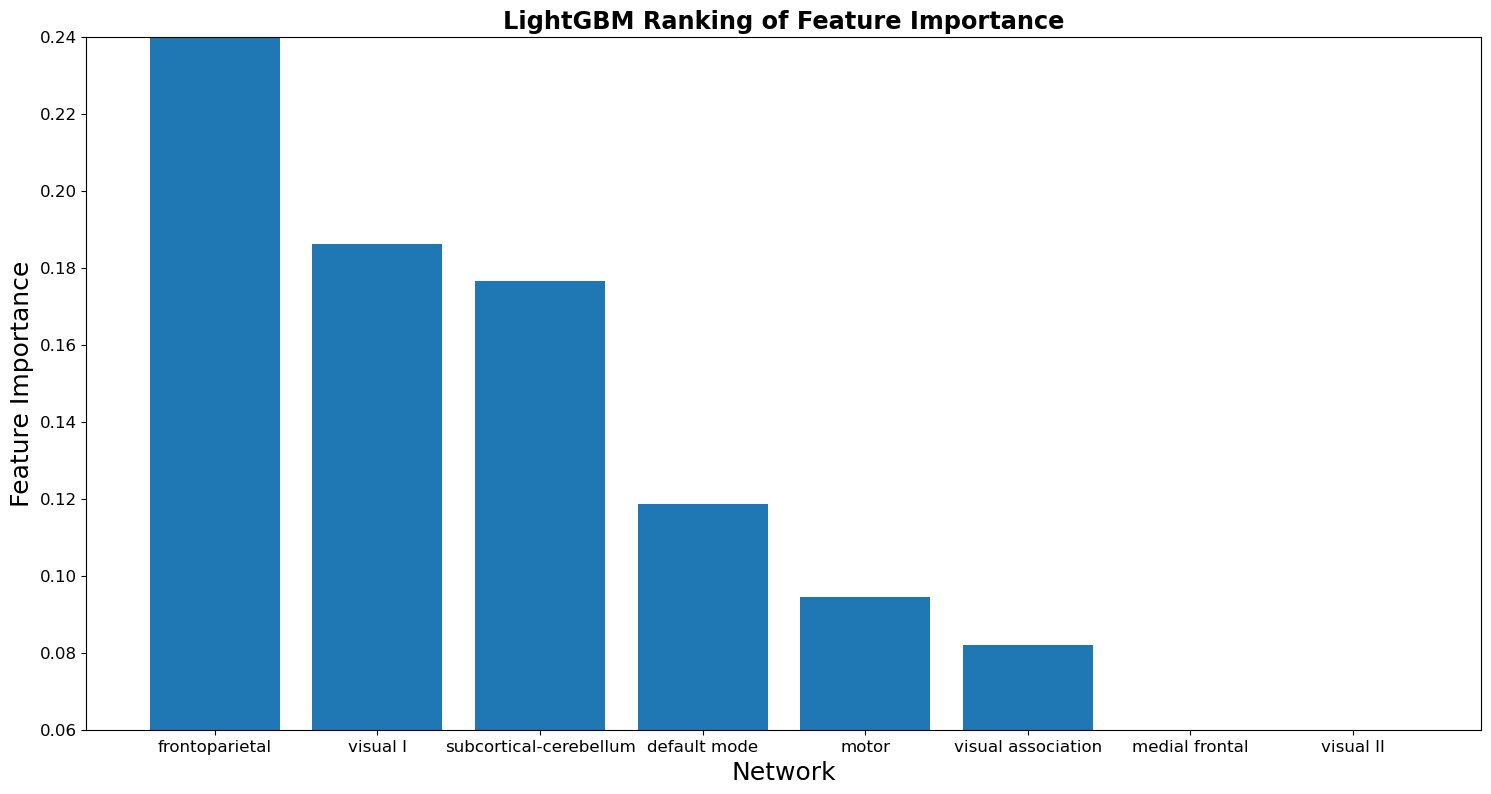

0.4925373134328358 0.3781094527363184 0.4925373134328358 0.4145936981757879


In [7]:
# Sort importances
dict1_sorted_values = sorted(importance.items(),key = lambda x:x[1],reverse = True)
sorted_net = {k:v for k,v in dict1_sorted_values}
sum_imp = 0
for i in sorted_net.values():
    sum_imp += i
for i in sorted_net.keys():
    sorted_net[i] = sorted_net[i]/sum_imp
    print(sorted_net[i])
# Plot importances 
plt.figure(figsize=(18, 9))
plt.ylim(0.06,0.24)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.bar(sorted_net.keys(), sorted_net.values())
plt.title('LightGBM Ranking of Feature Importance',fontsize='xx-large',fontweight='heavy')
plt.xlabel('Network',fontsize=18)
plt.ylabel('Feature Importance',fontsize=18)
plt.show()
print(sum_acc/67,sum_pre/67,sum_rec/67,sum_f1/67)

0.0381122942845043
0.27095240704889184
0.11862614159607004
0.17660645964645488
0.09460081241920108
0.18603448233458864
0.03307389406425938
0.08199350860602989
0.0381122942845043
0.27095240704889184
0.11862614159607004
0.17660645964645488
0.09460081241920108
0.18603448233458864
0.03307389406425938
0.08199350860602989


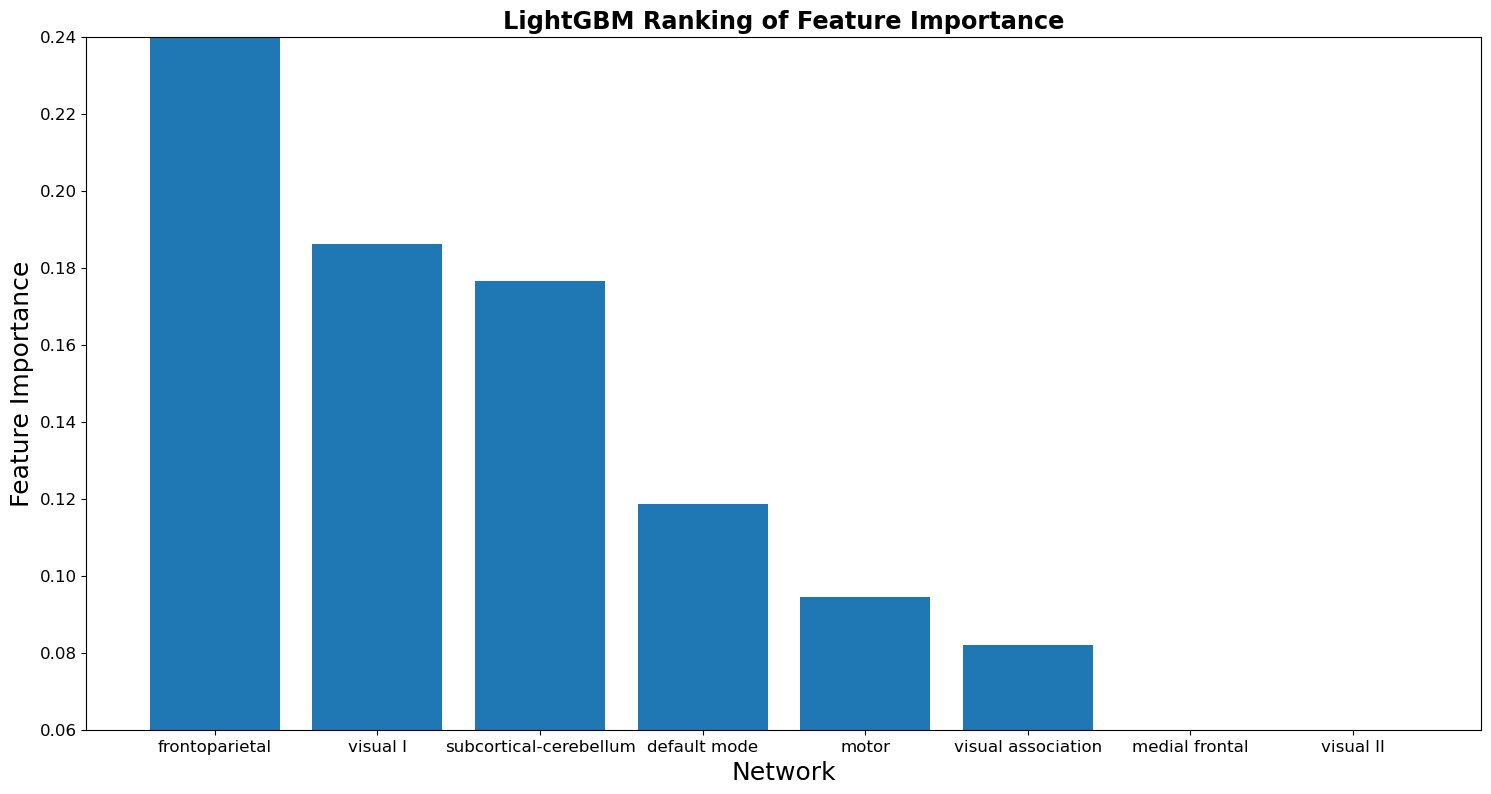

In [8]:
import math
cnt = 0
sum_i = 0
net_variance = np.zeros(8)
net_score = np.zeros(8)
for i in range(8):
    for j in range(67):
        net_score[i] += total_sorted_importance[j][net_name[i]]
    net_score[i] /= 67
    sum_i += net_score[i]
    print(net_score[i])
for i in range(8):
    net_score[i]/=sum_i
    print(net_score[i])
    
for i in range(8):
    for j in range(67):
        net_variance[i] += math.pow((total_sorted_importance[j][net_name[i]] - net_score[i]),2)
    net_variance[i] /= 67
    net_variance[i] = math.sqrt(net_variance[i])
# Plot importances 
plt.figure(figsize=(18, 9))
plt.ylim(0.06,0.24)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.bar(sorted_net.keys(), sorted_net.values())
plt.title('LightGBM Ranking of Feature Importance',fontsize='xx-large',fontweight='heavy')
plt.xlabel('Network',fontsize=18)
plt.ylabel('Feature Importance',fontsize=18)
plt.show()

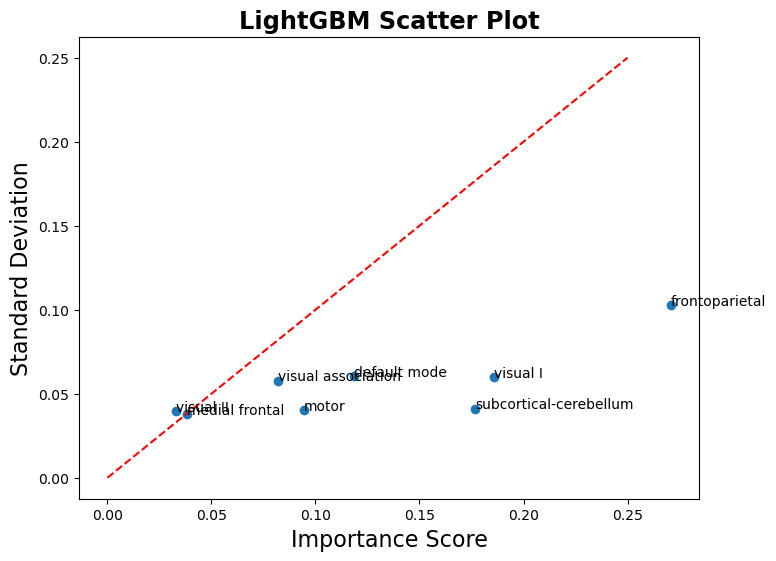

[0.03811229 0.27095241 0.11862614 0.17660646 0.09460081 0.18603448
 0.03307389 0.08199351]
[0.03782722 0.10264855 0.0605157  0.04102822 0.04035115 0.05991791
 0.03959195 0.05780959]


In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(net_score,net_variance)
#plt.plot([0, 0, 0, 0])
for i, name in enumerate(['medial frontal','frontoparietal','default mode','subcortical-cerebellum','motor','visual I','visual II','visual association']):
    plt.annotate(name,(net_score[i],net_variance[i]))
plt.title('LightGBM Scatter Plot',fontsize='xx-large',fontweight='heavy')
plt.xlabel('Importance Score',fontsize=16)
plt.ylabel('Standard Deviation',fontsize=16)
x_line = np.linspace(0,0.25)
y_line = x_line
plt.plot(x_line, y_line, 'r--')
plt.show()
print(net_score)
print(net_variance)